In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter('ignore')
%config InlineBackend.figure_formats = ['svg']
#Импорт нужных библиотек

In [5]:
full_data = pd.read_csv('data/DEAL_by_funnel_road_to_court.csv', sep=';')
full_data.head()
#Считывание и просмотр данных

,ID,Напрямок,Повторна угода,Повторне звернення,Стадія угоди,Контакт,Компанія,Імовірність,Статус оплати,Статус доставки,...,Коммерческое предложение от chatGPT,Оновити інформацію по паспорту,Оновити список кредиторів в угоді (КСК звіт),Створити білінг оплат по договорах,Створити дозвіл на розкриття банківської таємниці,Створити запит Житомир,Створити запити кредиторам,Створити запити кредиторам (Адвокатські),Створити згоди на розкриття даних,Unnamed: 647
0,18771,Початок шляху до суду,N,N,Збір документів,Леонтьєв Анатолій Григорович,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18761,Початок шляху до суду,N,N,ПОЧАТОК ШЛЯХУ ДО СУДУ,Тороп Олександр Олександрович,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18750,Початок шляху до суду,N,N,Збір документів,Романенко Юрій Дмитрович,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18745,Початок шляху до суду,N,N,ПОЧАТОК ШЛЯХУ ДО СУДУ,Тест null null,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18740,Початок шляху до суду,N,N,Збір документів,Лукяненко Аліна Андріївна,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
full_data['Відповідальний'] = full_data['Відповідальний'].replace({'Вікторія': 'Вікторія Урум', 'Інгвар':'Свиноріз Ігор'})
#Внесение Фамилии к сотруднику у которого нету фамилии в системе

full_data = full_data[(full_data['Стадія угоди'] == 'Передать до суду') | (full_data['Стадія угоди'] == 'Заява відправлена до суду')]

approved_columns = ['Відповідальний',
'Контакт',
'Логін та Пароль від електронної пошти для електронного суду', 
'Основний договір складений на суму', 
'Номер Основного договору',
'Заява до господарського суду', 
'Витрати. Сума щомісячних ВИТРАТ ЗАГАЛОМ (автоформула)',
'Дохід. Сума щомісячного ДОХОДУ ЗАГАЛОМ (автоформула)',
'НЕСУДИМОСТІ.СТАТУС. Довідка',
'ФОП. Довідка &quot;№ ___ від __.__.___&quot;',
'Довідка МРЕО. Відповідно до довідки &quot; № ____ від _____, виданої _________&quot;',
'Довідка з МРЕО. Наявність транспортних засобів. &quot;відсутні&quot; / &quot;є, а саме:&quot;',
"Про склад сім'ї. Записати через крапку з комою всіх ДОРОСЛИХ згідно довідки: &quot;(Ким приходиться)____ - ПІБ, ____ року народження, ______ відповідно до паспорту серії ___ №____ виданого ____ від____ &quot; / або &quot;відмовився надавати відомості&quot;"]

approved_data = full_data[approved_columns]
approved_data = approved_data \
.rename(columns={"Про склад сім'ї. Записати через крапку з комою всіх ДОРОСЛИХ згідно довідки: &quot;(Ким приходиться)____ - ПІБ, ____ року народження, ______ відповідно до паспорту серії ___ №____ виданого ____ від____ &quot; / або &quot;відмовився надавати відомості&quot;":"Про склад сім'ї",
                'Довідка з МРЕО. Наявність транспортних засобів. &quot;відсутні&quot; / &quot;є, а саме:&quot;':'Наявність т. з.',
                'Довідка МРЕО. Відповідно до довідки &quot; № ____ від _____, виданої _________&quot;':'Довідка МРЕО',
                'Логін та Пароль від електронної пошти для електронного суду':'Логін та Пароль Ел суд',
                'Основний договір складений на суму':'Сума договору',
                'Номер Основного договору':'Номер договору',
                'Заява до господарського суду':'Господарський суд',
                'НЕСУДИМОСТІ.СТАТУС. Довідка':'Несудимості',
                'ФОП. Довідка &quot;№ ___ від __.__.___&quot;':'ФОП. Довідка',
                'Витрати. Сума щомісячних ВИТРАТ ЗАГАЛОМ (автоформула)':'Витрати',
                'Дохід. Сума щомісячного ДОХОДУ ЗАГАЛОМ (автоформула)':'Дохід'})
#Отбор нужных полей и переменование столбцов

approved_data = approved_data[approved_data['Відповідальний'] \
                                  .isin(['Свиноріз Ігор','Балінська Валерія','Вікторія Урум','Романчук Андріана','Федорко Вікторія'])]
#Отбор нужных сотрудников

In [10]:
approved_data.groupby('Відповідальний').agg({'Контакт':'count'}).rename(columns={'Контакт':'Кількість_угод'}).reset_index()
#Количество сделок принявших участие в аналитике в разбивке по юристам.

,Відповідальний,Кількість_угод
0,Балінська Валерія,84
1,Вікторія Урум,123
2,Романчук Андріана,28
3,Свиноріз Ігор,57
4,Федорко Вікторія,7


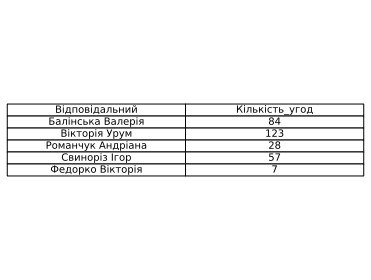

In [11]:
table = approved_data.groupby('Відповідальний').agg({'Контакт':'count'}).rename(columns={'Контакт':'Кількість_угод'}).reset_index()

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
ax.table(cellText=table.values, colLabels=table.columns, cellLoc='center', loc='center')
plt.savefig('grouped_table_image.png', bbox_inches='tight', dpi=300)
plt.show()

In [12]:
grouped_filtred_approved_data = approved_data.groupby('Відповідальний')
grouped_filtred_approved_data.apply(lambda x:x.isna().sum())
#Количество НЕ ЗАПОЛНЕННЫХ полей в сделке в разбивке по юристам.

,Відповідальний,Контакт,Логін та Пароль Ел суд,Сума договору,Номер договору,Господарський суд,Витрати,Дохід,Несудимості,ФОП. Довідка,Довідка МРЕО,Наявність т. з.,Про склад сім'ї
Відповідальний,,,,,,,,,,,,,
Балінська Валерія,0,0,77,2,3,53,71,72,79,58,57,65,73
Вікторія Урум,0,0,88,0,0,44,58,67,109,56,52,50,64
Романчук Андріана,0,0,28,0,0,9,26,26,24,21,17,18,27
Свиноріз Ігор,0,0,12,1,2,2,15,12,53,9,8,6,13
Федорко Вікторія,0,0,4,1,1,0,7,7,7,7,7,7,7


In [13]:
final_result_persentage = grouped_filtred_approved_data.apply(lambda x:x.notna().sum()/len(x)*100)
final_result_persentage = final_result_persentage.drop('Відповідальний', axis=1)
final_result_persentage
#Процент ЗАПОЛНЕННЫХ полей в сделке в разбивке по юристам.

,Контакт,Логін та Пароль Ел суд,Сума договору,Номер договору,Господарський суд,Витрати,Дохід,Несудимості,ФОП. Довідка,Довідка МРЕО,Наявність т. з.,Про склад сім'ї
Відповідальний,,,,,,,,,,,,
Балінська Валерія,100.0,8.333333,97.619048,96.428571,36.904762,15.476190,14.285714,5.952381,30.952381,32.142857,22.619048,13.095238
Вікторія Урум,100.0,28.455285,100.000000,100.000000,64.227642,52.845528,45.528455,11.382114,54.471545,57.723577,59.349593,47.967480
Романчук Андріана,100.0,0.000000,100.000000,100.000000,67.857143,7.142857,7.142857,14.285714,25.000000,39.285714,35.714286,3.571429
Свиноріз Ігор,100.0,78.947368,98.245614,96.491228,96.491228,73.684211,78.947368,7.017544,84.210526,85.964912,89.473684,77.192982
Федорко Вікторія,100.0,42.857143,85.714286,85.714286,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


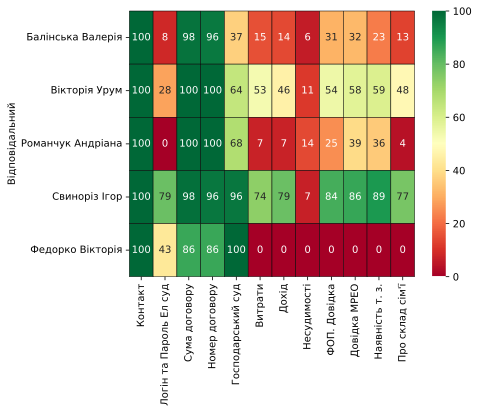

In [15]:
sns.heatmap(data=final_result_persentage, cmap="RdYlGn", annot=True, fmt=".0f", linewidths=0.5, linecolor='black')
plt.savefig('heatmap_plot.png', dpi=300, bbox_inches='tight') 